In [21]:
import pandas as pd
import numpy as np
import os 
import statistics 
from pathlib import Path
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import math
from statsmodels.stats.anova import AnovaRM
from numpy import mean, std, cov
from numpy.random import seed, randn
import random as rd
#from sklearn import preprocessing
#from sklearn import datasets
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
from __future__ import division
import sys
import scipy
from math import sqrt
import scipy.stats as stats
from scipy import stats 
from scipy.stats import t, pearsonr, sem, spearmanr
import seaborn as sns
from statistics import mean, stdev
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import pingouin as pg
from pingouin import ttest
from scipy.special import logsumexp
from matplotlib.patches import Patch

In [2]:
current_dir = os.getcwd()
updatedchoicedata = pd.read_csv('shortformdata_DF.csv')
plottingdata = pd.read_csv('longformdata_DF_plotting.csv')

In [3]:
rej = updatedchoicedata.loc[updatedchoicedata['condition_recode']==1].reset_index(drop=True)
acc = updatedchoicedata.loc[updatedchoicedata['condition_recode']==2].reset_index(drop=True)
neu = updatedchoicedata.loc[updatedchoicedata['condition_recode']==0].reset_index(drop=True)
print(rej)
print(len(rej))
print(len(neu))
print(len(acc))

                 PROLIFIC_ID  condition_recode  afterstresschange  \
0   568d286ab5a2c2000cb6a91c                 1                1.0   
1   595727bd7c76640001aa8f6e                 1                1.0   
2   5a4636c92f91ec0001dcba07                 1                0.0   
3   5ad2c8334d061300011b1985                 1                0.0   
4   5adef850eb60400001539109                 1                0.0   
..                       ...               ...                ...   
79  63fac97f0d4e8f6bfd753d90                 1                1.0   
80  6400d8ca785ee04d9b02ae9c                 1                1.0   
81  64023a98627b1116180dff0b                 1                1.0   
82  641361334c91a0c6ff4c5b79                 1                1.0   
83  641a3df3c874807a1a8734bc                 1                1.0   

    salience_mean  stress_mean  recoded_stress    choice  rej-acc  ifnegvalue  \
0             1.5          4.5             4.5  1.000000     -0.5           1   
1        

/Users/jordansiegel/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [42]:
#mediansplit data according to affect ratings within each condition
import pandas as pd

# Calculate the median
median_value = rej['recoded_stress'].median()

# Perform the median split
rej['Group'] = ['Rej_Pos' if x > median_value else 'Rej_Neg' for x in rej['recoded_stress']]

# Display the DataFrame
print(rej)


                 PROLIFIC_ID  condition_recode  afterstresschange  \
0   568d286ab5a2c2000cb6a91c                 1                1.0   
1   595727bd7c76640001aa8f6e                 1                1.0   
2   5a4636c92f91ec0001dcba07                 1                0.0   
3   5ad2c8334d061300011b1985                 1                0.0   
4   5adef850eb60400001539109                 1                0.0   
..                       ...               ...                ...   
79  63fac97f0d4e8f6bfd753d90                 1                1.0   
80  6400d8ca785ee04d9b02ae9c                 1                1.0   
81  64023a98627b1116180dff0b                 1                1.0   
82  641361334c91a0c6ff4c5b79                 1                1.0   
83  641a3df3c874807a1a8734bc                 1                1.0   

    salience_mean  stress_mean  recoded_stress    choice  rej-acc  ifnegvalue  \
0             1.5          4.5             4.5  1.000000     -0.5           1   
1        

In [43]:
#mediansplit data according to affect ratings within each condition
#'Low'= greater values of self-reported stress which are values of less negative affect
import pandas as pd

# Calculate the median
median_value = acc['recoded_stress'].median()

# Perform the median split
acc['Group'] = ['Acc_Pos' if x > median_value else 'Acc_Neg' for x in acc['recoded_stress']]

# Display the DataFrame
print(acc)

                 PROLIFIC_ID  condition_recode  afterstresschange  \
0   568d286ab5a2c2000cb6a91c                 2                1.0   
1   595727bd7c76640001aa8f6e                 2                1.0   
2   5a4636c92f91ec0001dcba07                 2                0.0   
3   5ad2c8334d061300011b1985                 2                0.0   
4   5adef850eb60400001539109                 2                0.0   
..                       ...               ...                ...   
79  63fac97f0d4e8f6bfd753d90                 2                1.0   
80  6400d8ca785ee04d9b02ae9c                 2                1.0   
81  64023a98627b1116180dff0b                 2                1.0   
82  641361334c91a0c6ff4c5b79                 2                1.0   
83  641a3df3c874807a1a8734bc                 2                1.0   

    salience_mean  stress_mean  recoded_stress    choice  rej-acc  ifnegvalue  \
0             3.5          5.0             5.0  1.000000     -0.5           1   
1        

In [44]:
import pandas as pd

# Append df2 to df1
df_barplotofinteraction = rej.append(acc, ignore_index=True)

print(df_barplotofinteraction)


                  PROLIFIC_ID  condition_recode  afterstresschange  \
0    568d286ab5a2c2000cb6a91c                 1                1.0   
1    595727bd7c76640001aa8f6e                 1                1.0   
2    5a4636c92f91ec0001dcba07                 1                0.0   
3    5ad2c8334d061300011b1985                 1                0.0   
4    5adef850eb60400001539109                 1                0.0   
..                        ...               ...                ...   
163  63fac97f0d4e8f6bfd753d90                 2                1.0   
164  6400d8ca785ee04d9b02ae9c                 2                1.0   
165  64023a98627b1116180dff0b                 2                1.0   
166  641361334c91a0c6ff4c5b79                 2                1.0   
167  641a3df3c874807a1a8734bc                 2                1.0   

     salience_mean  stress_mean  recoded_stress    choice  rej-acc  \
0              1.5          4.5             4.5  1.000000     -0.5   
1              4.0 

<ipython-input-44-eb1b3145693c>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_barplotofinteraction = rej.append(acc, ignore_index=True)


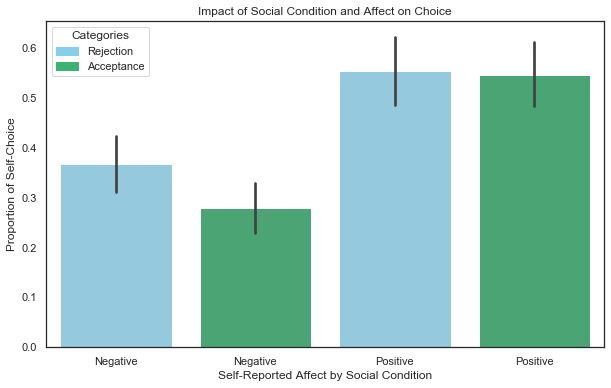

In [63]:
sns.set(style="white")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot
colors = ['skyblue','mediumseagreen','skyblue','mediumseagreen']  # Blue, orange, green, red
order = ['Rej_Neg', 'Acc_Neg', 'Rej_Pos', 'Acc_Pos']  # Specify the desired order

ax = sns.barplot(x='Group', y='choice', data=df_barplotofinteraction, palette= colors, order=order, ci = 68)

plt.title('Impact of Social Condition and Affect on Choice')
plt.xlabel('Self-Reported Affect by Social Condition')  # Label for the x-axis
plt.ylabel('Proportion of Self-Choice')  # Label for the y-axis

new_labels = ['Negative', 'Negative', 'Positive', 'Positive']
ax.set_xticklabels(new_labels)

# Create custom legend
legend_labels = ['Rejection', 'Acceptance']
legend_colors = ['skyblue','mediumseagreen']
legend_patches = [Patch(color=legend_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]

plt.legend(handles=legend_patches, title="Categories", loc='upper left')

# Show the plot

plt.savefig('fourbarinteractionplot.png', dpi=300, bbox_inches='tight')

plt.show()



